In [32]:
# Import packages
import numpy as np
import pandas as pd
from fastai.vision.all import *

In [33]:
# Import image labels
df = pd.read_csv('images/labels.csv')
df.head()

,files,labels
0,IMG_3788.JPEG,sweetclem
1,IMG_3789.JPEG,sweetclem
2,IMG_3790.JPEG,sweetclem
3,IMG_3791.JPEG,sweetclem
4,IMG_3792.JPEG,sweetclem


In [34]:
# Setup image transforms
tfms = aug_transforms(size=224,flip_vert=True, max_rotate=25, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [35]:
# Load image data from image labels and jpg files
dls = ImageDataLoaders.from_df(df, 'images', valid_pct=0.2, label_delim=' ',
                               item_tfms=Resize(224), bs=20, batch_tfms=tfms)
dls.valid_ds.items

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


,files,labels
23,IMG_3811.JPEG,pink_lady
52,IMG_3840.JPEG,royal_gala braeburn
8,IMG_3796.JPEG,sweetclem
27,IMG_3815.JPEG,braeburn
15,IMG_3803.JPEG,sweetclem
25,IMG_3813.JPEG,pink_lady
33,IMG_3821.JPEG,braeburn
24,IMG_3812.JPEG,pink_lady
56,IMG_3844.JPEG,pink_lady royal_gala
45,IMG_3833.JPEG,royal_gala


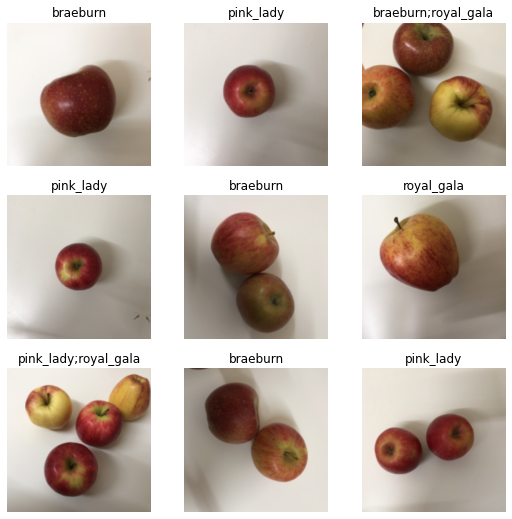

In [36]:
# Preview data
dls.show_batch()

In [37]:
# Init learner; use resnet50 as the starting point for this CNN
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.5))

SuggestedLRs(valley=0.0006918309954926372)

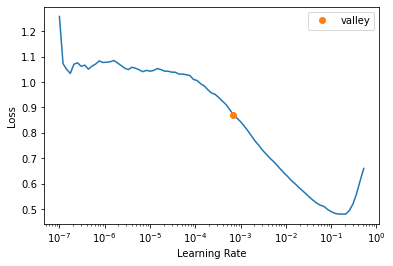

In [38]:
# Calc optimal learning rate
learn.lr_find()

In [39]:
# Train model
learn.fine_tune(5, 7e-4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,1.066052,1.279071,0.318182,00:19


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.828554,1.056224,0.386364,00:23
1,0.775394,0.868475,0.409091,00:23
2,0.754466,0.799782,0.590909,00:22
3,0.677571,0.757330,0.590909,00:21
4,0.627642,0.715810,0.613636,00:22


SuggestedLRs(valley=0.00010964782268274575)

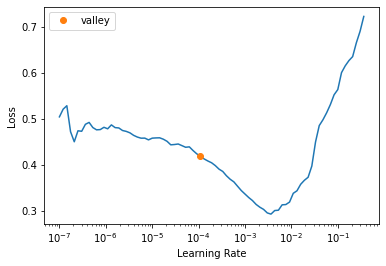

In [40]:
# Calc optimal learning rate
learn.lr_find()

In [41]:
# Train model
learn.fine_tune(5, 1.1e-4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.401233,0.672111,0.727273,00:20


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.483884,0.639269,0.704545,00:22
1,0.451663,0.628248,0.727273,00:23
2,0.417439,0.618319,0.727273,00:23
3,0.412870,0.595146,0.704545,00:22
4,0.405916,0.568784,0.727273,00:22


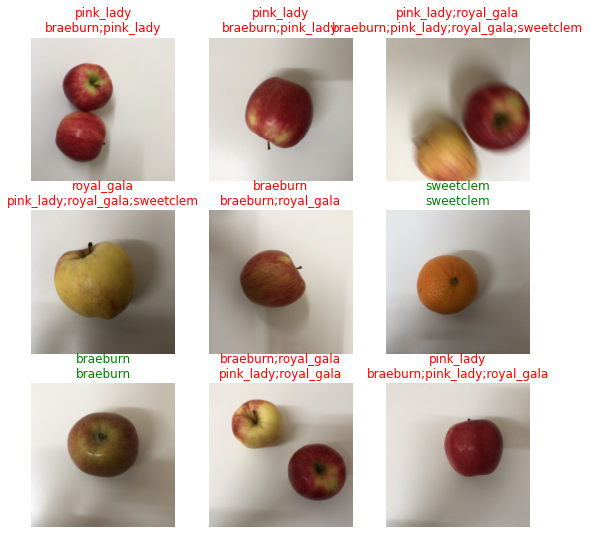

In [42]:
# Preview results
learn.show_results()